In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# Local imports
try:
    import csiborgtools
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import csiborgtools
import utils

%load_ext autoreload
%autoreload 2

In [28]:
Nsim = 9844
Nsnap = 1016


sim = utils.load_processed(Nsim, Nsnap)
sim = sim[sim["dist"] < 200]

gals = utils.load_2mpp()
gals = gals[gals["CDIST_CMB"] < 200]
planck = utils.load_planck2015()


9


<IPython.core.display.Javascript object>


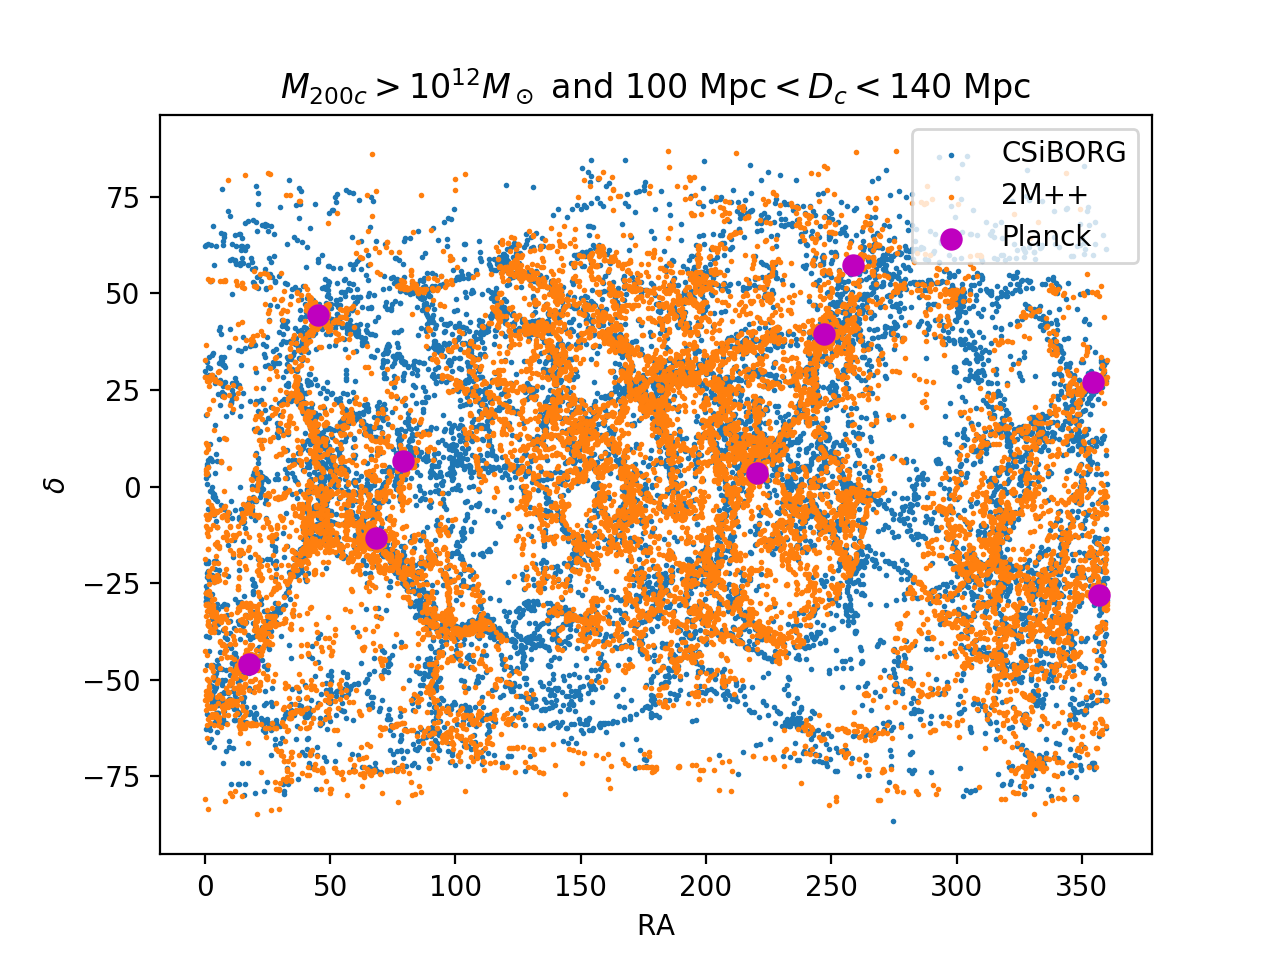

In [101]:
dx = 40
dmin = 100
dmax = dmin + dx

mask_obs = (dmin < gals["CDIST_CMB"]) & (gals["CDIST_CMB"] < dmax)
mask_sim = (dmin < sim["dist"]) & (sim["dist"] < dmax) & (sim["m200"] > 1e12)
mask_planck = (dmin < planck["COMDIST"]) & (planck["COMDIST"] < dmax)

print(mask_planck.sum())

plt.figure()
plt.scatter(sim["ra"][mask_sim], sim["dec"][mask_sim], s=1, label="CSiBORG")
plt.scatter(gals["RA"][mask_obs], gals["DEC"][mask_obs], s=1, label="2M++")
plt.scatter(planck["RA"][mask_planck], planck["DEC"][mask_planck], s=50, label="Planck", c="m")
plt.legend()
plt.title(r"$M_{{200c}} > 10^{{12}} M_\odot$ and ${}~\mathrm{{Mpc}} < D_{{c}} < {}~\mathrm{{Mpc}}$"
          .format(dmin, dmax))
plt.xlabel(r"$\mathrm{RA}$")
plt.ylabel(r"$\delta$")
plt.savefig("../plots/sky_comparison.png", dpi=400)
plt.show()

<IPython.core.display.Javascript object>


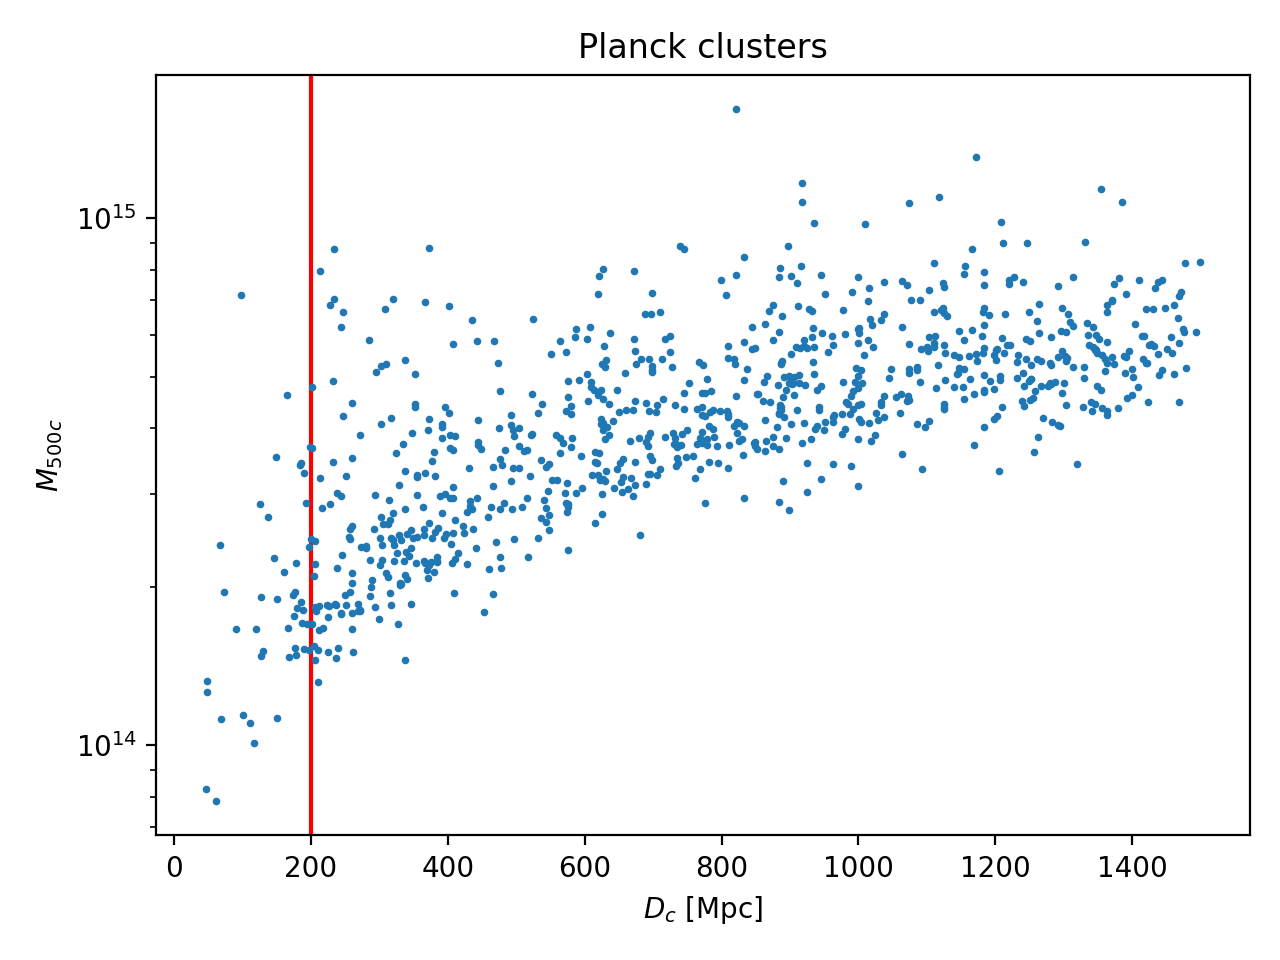

In [75]:
planck = utils.load_planck2015(1500)

plt.figure()
plt.scatter(planck["COMDIST"], planck["MSZ"], s=3)

plt.axvline(200, c="red", zorder=0)

plt.title("Planck clusters")
plt.xlabel(r"$D_{c}~[\mathrm{Mpc}]$")
plt.ylabel(r"$M_{500c}$")
plt.yscale("log")
plt.tight_layout()
plt.savefig("../plots/planck_mass_dist.png", dpi=450)
plt.show()

In [77]:
planck = utils.load_planck2015(200)

<IPython.core.display.Javascript object>


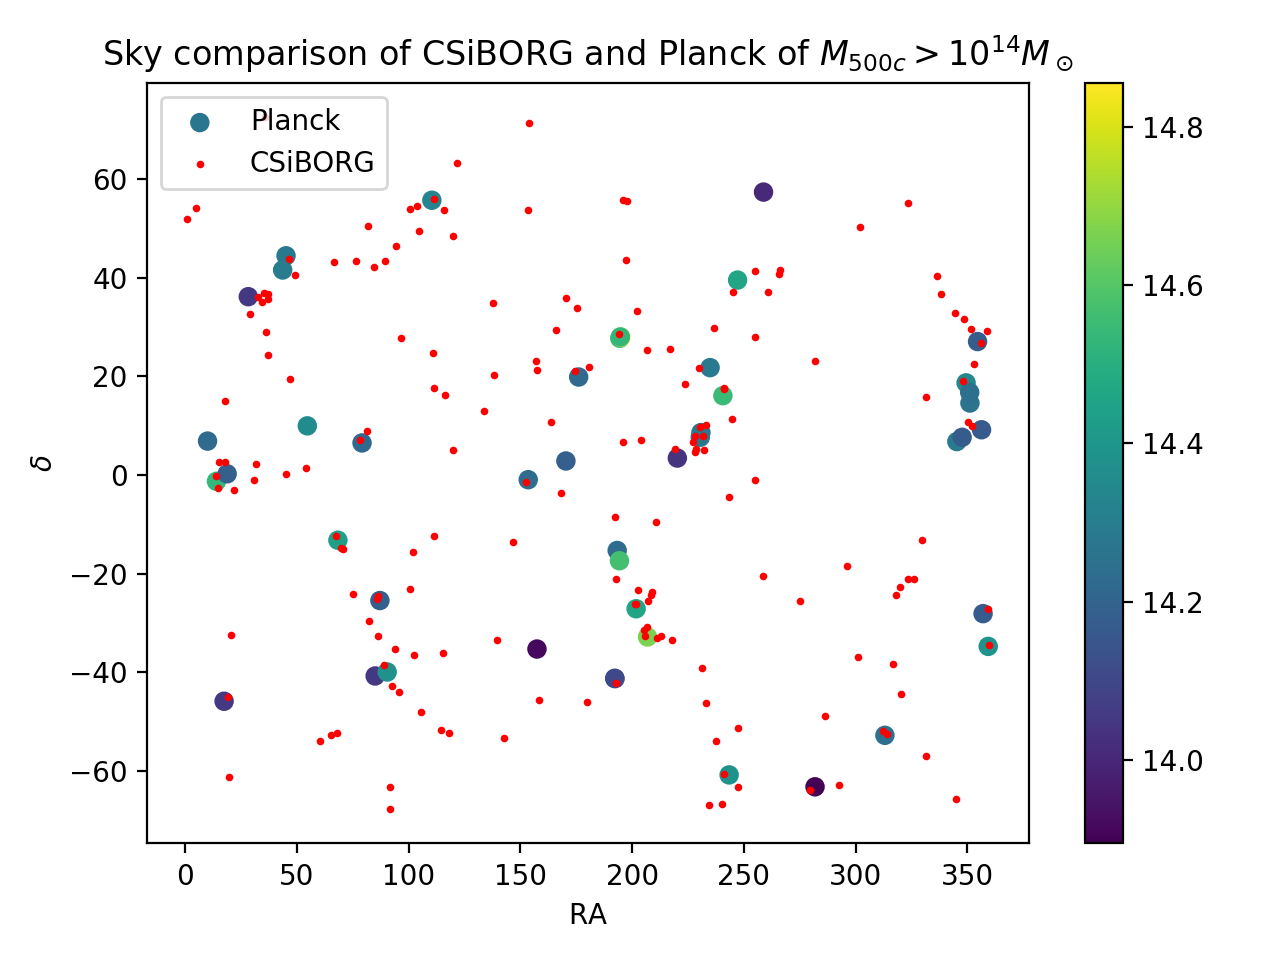

In [103]:
mask_sim = sim["m500"] > 1e14
mask_planck = planck["MSZ"] > 1e14

plt.figure()
plt.scatter(planck["RA"], planck["DEC"], label="Planck", c=np.log10(planck["MSZ"]))
plt.colorbar()
plt.scatter(sim["ra"][mask_sim], sim["dec"][mask_sim], label="CSiBORG", c="red", s=3, zorder=1)

plt.legend(loc=2)

plt.title(r"Sky comparison of CSiBORG and Planck of $M_{500c} > 10^{14} M_\odot$")
plt.xlabel(r"$\mathrm{RA}$")
plt.ylabel(r"$\delta$")
plt.tight_layout()
plt.savefig("../plots/clusters_positions.png", dpi=450)

plt.show()